In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
from pathlib import Path
import geopandas as gpd
import plotly.io as pio
import plotly.express as px
from mpl_toolkits.axes_grid1 import make_axes_locatable


import folium
from folium.features import GeoJsonPopup


In [78]:
jobs_data_load = Path("Resources/jobsdata.csv")
jobs_data =pd.read_csv(jobs_data_load)

jobs_data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
...,...,...,...,...,...,...,...,...,...,...,...,...
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research


In [79]:
mean_salary_usd = jobs_data['salary_in_usd'].mean()


print("the Average salary is" , mean_salary_usd)


the Average salary is 149472.04944010143


In [80]:
median_salary = jobs_data['salary_in_usd'].median()
min_salary= jobs_data['salary_in_usd'].min()
max_salary= jobs_data['salary_in_usd'].max()


print("the median salary is", median_salary)
print("the lowest pay is ", min_salary)
print("the highest pay is ", max_salary)

the median salary is 142000.0
the lowest pay is  15000
the highest pay is  450000


In [81]:
work_setting_counts = jobs_data['work_setting'].value_counts()

work_setting_counts

work_setting
In-person    9413
Remote       4573
Hybrid        213
Name: count, dtype: int64

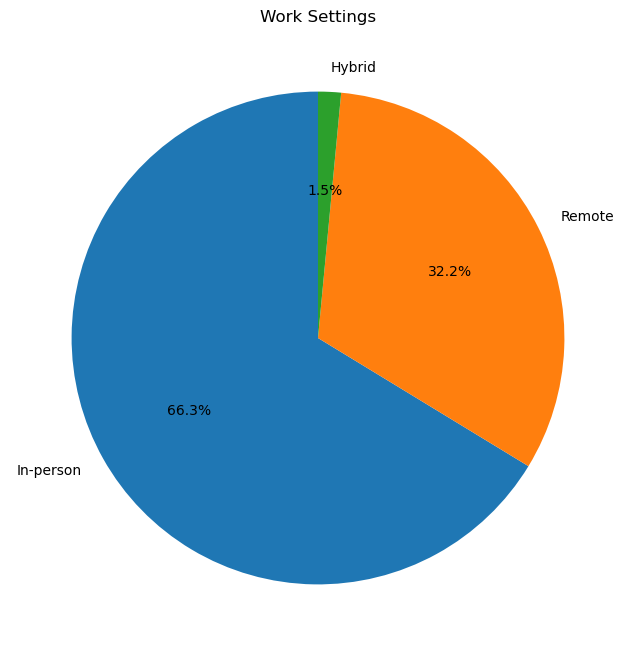

In [82]:
plt.figure(figsize=(8, 8))
plt.pie(work_setting_counts, labels=work_setting_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Work Settings')

plt.show()

In [83]:
company_location_counts = jobs_data['company_location'].value_counts()

company_location_counts.head()

company_location
United States     12465
United Kingdom      623
Canada              373
Spain               127
Germany              96
Name: count, dtype: int64

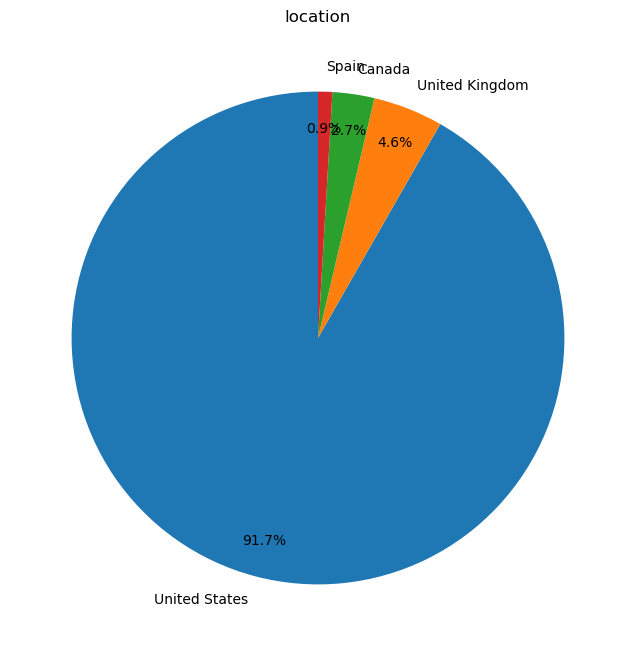

In [84]:
company_location_counts = jobs_data['company_location'].value_counts().nlargest(4)

# plotting the pie graph



# Plotting the pie chart with spaced labels
plt.figure(figsize=(8, 8))
plt.pie(company_location_counts, labels=company_location_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('location')
plt.show()


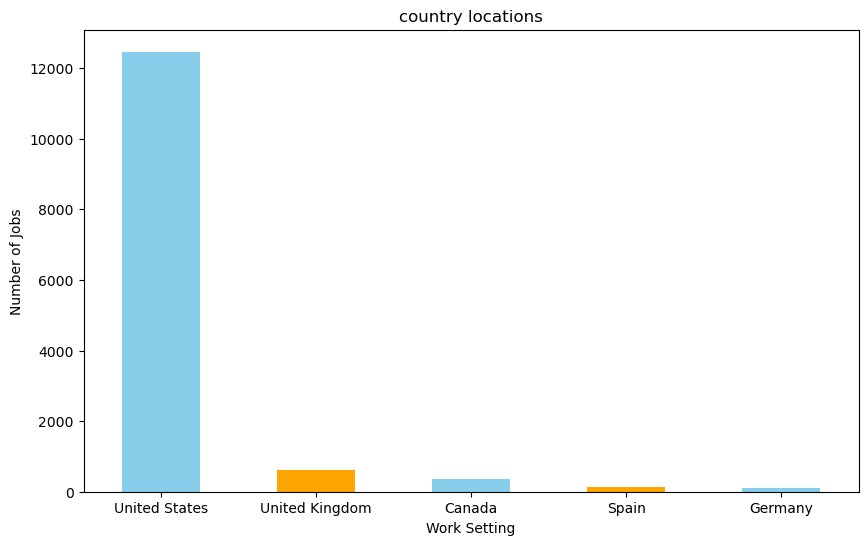

In [85]:
company_location_counts = jobs_data['company_location'].value_counts().nlargest(5)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
company_location_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('country locations')
plt.xlabel('Work Setting')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=0)
plt.show()

In [86]:

df_counts = jobs_data['employee_residence'].value_counts().reset_index()



df_counts


,employee_residence,count
0,United States,12418
1,United Kingdom,616
2,Canada,371
3,Spain,131
4,Germany,90
...,...,...
81,Andorra,1
82,Uganda,1
83,Oman,1
84,Qatar,1


In [63]:
job_category_counts = jobs_data.groupby(['work_year', 'job_category']).size().reset_index(name='count')

#the graph 
pio.templates.default = "presentation"
fig = px.bar(job_category_counts, x='work_year', y='count', color='job_category',
             title='Year-on-Year Comparison of Job Categories',
             labels={'count': 'Count', 'work_year': 'Year', 'job_category': 'Job Category'},
             barmode='group')
fig.show()


In [87]:
top4jobs = jobs_data.groupby(['work_year', 'job_category']).size().reset_index(name='count').head(4)
top4jobs


,work_year,job_category,count
0,2020,Data Analysis,15
1,2020,Data Engineering,17
2,2020,Data Science and Research,29
3,2020,Machine Learning and AI,10


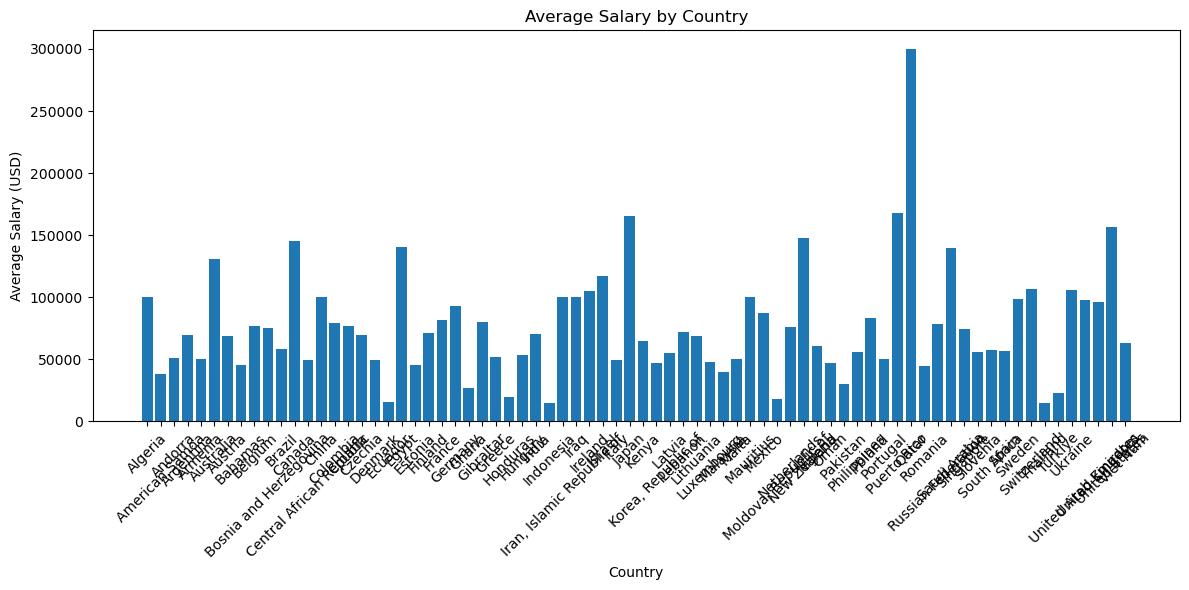

In [67]:


# Assuming 'company_location' contains country names
avg_salary_by_location = jobs_data.groupby('company_location')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(avg_salary_by_location['company_location'], avg_salary_by_location['salary_in_usd'])
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [89]:
country_counts = jobs_data['company_location'].value_counts()
country_counts


company_location
United States           12465
United Kingdom            623
Canada                    373
Spain                     127
Germany                    96
                        ...  
Andorra                     1
Qatar                       1
Mauritius                   1
Gibraltar                   1
Moldova, Republic of        1
Name: count, Length: 74, dtype: int64

/var/folders/bk/qtkxpw892q16zw4ggz5rwmth0000gn/T/ipykernel_7370/370808410.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

/var/folders/bk/qtkxpw892q16zw4ggz5rwmth0000gn/T/ipykernel_7370/370808410.py:13: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




NameError: name 'top_10_countries' is not defined

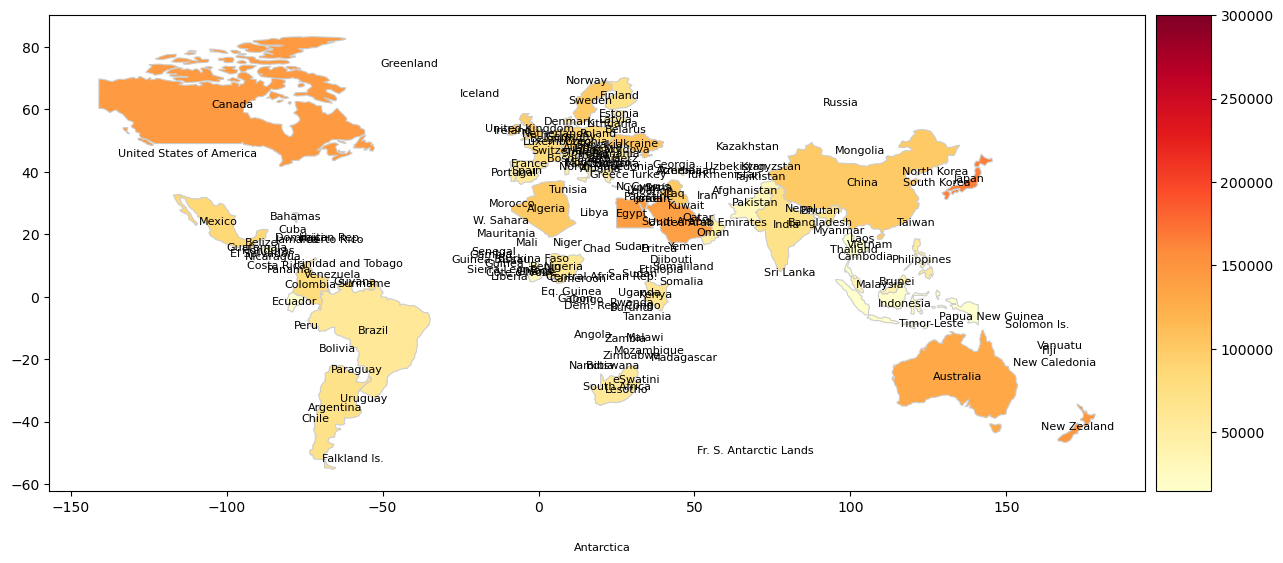

In [71]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the average salary data
merged = world.merge(avg_salary_by_location, how='left', left_on='name', right_on='company_location')

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
merged.plot(column='salary_in_usd', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

# Add country names as annotations
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['name']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Filter to show only the top 10 countries
top_10_countries = top_10_countries[top_10_countries['Country'].isin(merged['name'])]

# Add the top 10 countries to the map
for country in top_10_countries['Country']:
    country_data = merged[merged['name'] == country]
    ax.text(country_data.geometry.centroid.x, country_data.geometry.centroid.y, country, fontsize=8, ha='center', va='center', color='black')

ax.set_title('Average Salary by Country')
ax.axis('off')
plt.show()

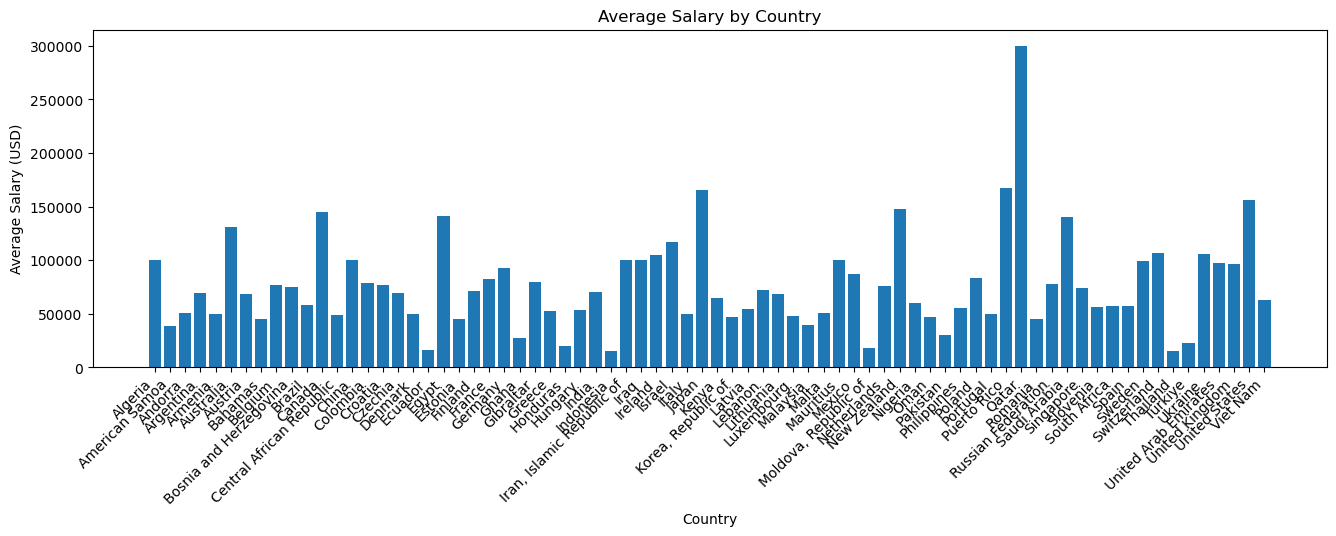

In [90]:
avg_salary_by_location = jobs_data.groupby('company_location')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(14, 6))  # Increase the figure size
plt.bar(avg_salary_by_location['company_location'], avg_salary_by_location['salary_in_usd'])
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Country')
plt.xticks(rotation=45, ha='right')  # Rotate the labels and align to the right
plt.tight_layout(pad=3.0)  # Increase padding
plt.show()

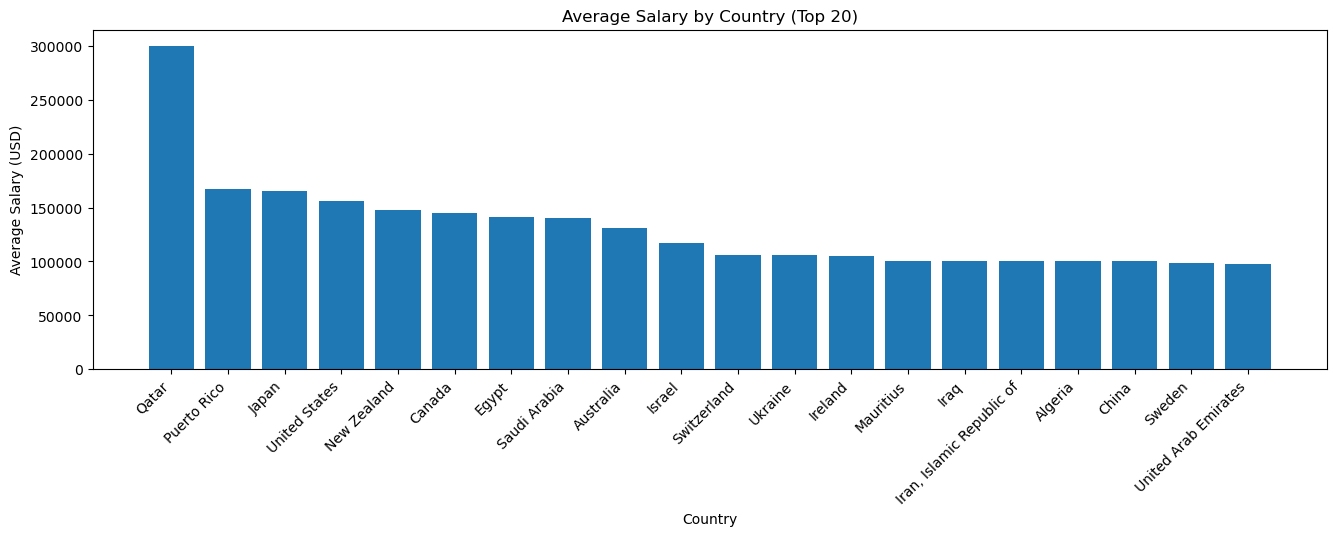

In [91]:
avg_salary_by_location = jobs_data.groupby('company_location')['salary_in_usd'].mean().reset_index()
top_15_countries = avg_salary_by_location.sort_values('salary_in_usd', ascending=False).head(20)

plt.figure(figsize=(14, 6))
plt.bar(top_15_countries['company_location'], top_15_countries['salary_in_usd'])
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Country (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=3.0)
plt.show()

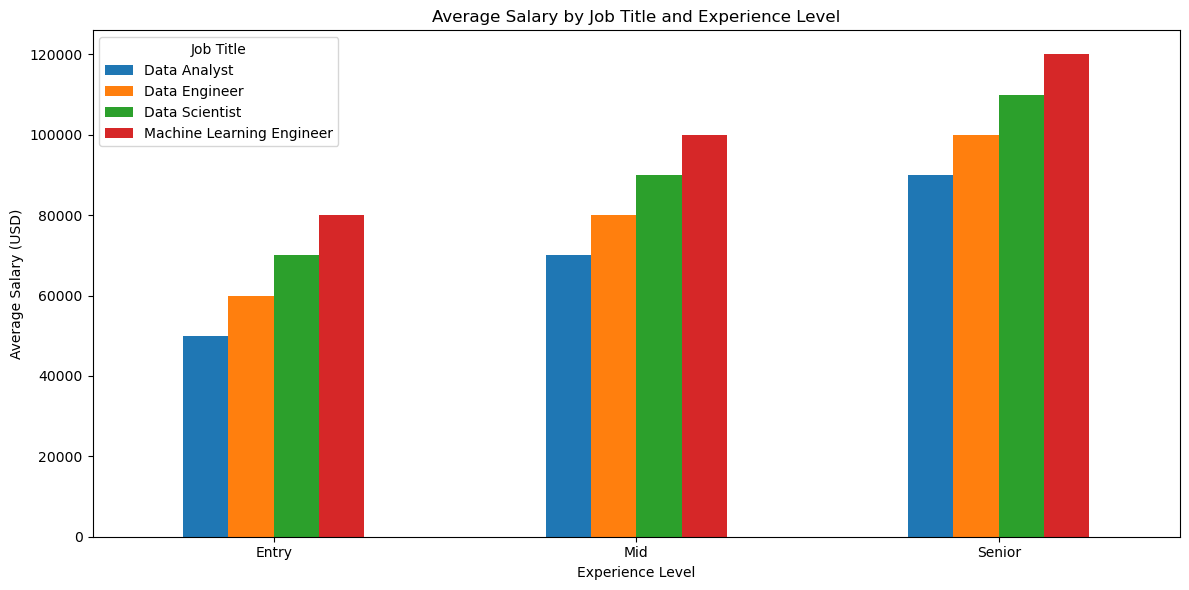

In [92]:
data = {
    'experience_level': ['Entry', 'Mid', 'Senior', 'Entry', 'Mid', 'Senior', 'Entry', 'Mid', 'Senior', 'Entry', 'Mid', 'Senior'],
    'job_title': ['Data Analyst', 'Data Analyst', 'Data Analyst', 'Data Engineer', 'Data Engineer', 'Data Engineer', 'Data Scientist', 'Data Scientist', 'Data Scientist', 'Machine Learning Engineer', 'Machine Learning Engineer', 'Machine Learning Engineer'],
    'salary_in_usd': [50000, 70000, 90000, 60000, 80000, 100000, 70000, 90000, 110000, 80000, 100000, 120000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate average salary for each job title and experience level
avg_salary = df.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().reset_index()

# Pivot the DataFrame to have job titles as columns
avg_salary_pivot = avg_salary.pivot(index='experience_level', columns='job_title', values='salary_in_usd')

# Plot the graph
avg_salary_pivot.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Job Title and Experience Level')
plt.xticks(rotation=0)
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()